<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#08-Hyper-Parameter-Optimization-(Model-Tuning)" data-toc-modified-id="08-Hyper-Parameter-Optimization-(Model-Tuning)-1">08 Hyper Parameter Optimization (Model Tuning)</a></span></li><li><span><a href="#Support-Vector-Machine---Hyper-Parameters-Tuning" data-toc-modified-id="Support-Vector-Machine---Hyper-Parameters-Tuning-2">Support Vector Machine - Hyper Parameters Tuning</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-CV" data-toc-modified-id="Grid-Search-CV-2.1">Grid Search CV</a></span></li><li><span><a href="#Model-with-Best-Parameters" data-toc-modified-id="Model-with-Best-Parameters-2.2">Model with Best Parameters</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-2.3">Model Evaluation</a></span></li></ul></li><li><span><a href="#K-Means---Hyper-Parameters-Tuning" data-toc-modified-id="K-Means---Hyper-Parameters-Tuning-3">K-Means - Hyper Parameters Tuning</a></span><ul class="toc-item"><li><span><a href="#Elbow-Method---to-find-Optimal-Point-to-reduce-Inertia" data-toc-modified-id="Elbow-Method---to-find-Optimal-Point-to-reduce-Inertia-3.1">Elbow Method - to find Optimal Point to reduce Inertia</a></span></li><li><span><a href="#Using-Grid-Search-CV" data-toc-modified-id="Using-Grid-Search-CV-3.2">Using Grid Search CV</a></span></li></ul></li><li><span><a href="#k-NN---Hyper-Parameter-Tuning" data-toc-modified-id="k-NN---Hyper-Parameter-Tuning-4">k-NN - Hyper Parameter Tuning</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-CV" data-toc-modified-id="Grid-Search-CV-4.1">Grid Search CV</a></span></li><li><span><a href="#Manually-Scoring-and-Visualization" data-toc-modified-id="Manually-Scoring-and-Visualization-4.2">Manually Scoring and Visualization</a></span></li></ul></li><li><span><a href="#Overfitting-and-Underfitting" data-toc-modified-id="Overfitting-and-Underfitting-5">Overfitting and Underfitting</a></span></li></ul></div>

-------

# 08 Hyper Parameter Optimization (Model Tuning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
    
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()

In [7]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Support Vector Machine - Hyper Parameters Tuning
## Grid Search CV

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [14]:
svr_model = SVR()

In [15]:
parameters = {
    'kernel': ['rbf', 'linear'],
    'gamma': [0.01, 0.1, 1, 10]
}

In [16]:
cv = GridSearchCV(svr_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=2)

In [17]:
cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .............................gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .............................gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .............................gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .............................gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .............................gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........................gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..........................gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..........................gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..........................gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..........................gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............................gamma=0.1,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=2)

In [18]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+-{}) for {}'.format(round(mean,3), round(std * 2,3), params))

In [19]:
print_results(cv)

BEST PARAMS: {'gamma': 0.01, 'kernel': 'linear'}

-79.955 (+-19.201) for {'gamma': 0.01, 'kernel': 'rbf'}
-35.118 (+-7.758) for {'gamma': 0.01, 'kernel': 'linear'}
-57.076 (+-11.733) for {'gamma': 0.1, 'kernel': 'rbf'}
-35.118 (+-7.758) for {'gamma': 0.1, 'kernel': 'linear'}
-37.36 (+-12.271) for {'gamma': 1, 'kernel': 'rbf'}
-35.118 (+-7.758) for {'gamma': 1, 'kernel': 'linear'}
-59.385 (+-15.908) for {'gamma': 10, 'kernel': 'rbf'}
-35.118 (+-7.758) for {'gamma': 10, 'kernel': 'linear'}


In [21]:
cv.best_estimator_

SVR(gamma=0.01, kernel='linear')

In [23]:
cv.best_params_

{'gamma': 0.01, 'kernel': 'linear'}

## Model with Best Parameters

In [27]:
final_svr_model = SVR(gamma=0.01, kernel='linear')

In [28]:
final_svr_model.fit(scaled_X_train, y_train)

SVR(gamma=0.01, kernel='linear')

In [30]:
predictions = final_svr_model.predict(scaled_X_test)

## Model Evaluation

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, predictions)

print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('R^2 Score: ', R2)

MAE:  2.995107074378878
MSE:  26.09835442900856
RMSE:  5.108654855146172
R^2 Score:  0.6273108816510935


In [35]:
def mean_abosulte_percentage_error(y_true, y_pred):
    y_ture, y_pred = np.array(y_true), np.array(y_pred)
    MAPE = np.mean(np.abs(y_true - y_pred) / y_true) * 100
    return MAPE

In [36]:
MAPE = mean_abosulte_percentage_error(y_test, predictions)
print('MAPE: ', MAPE)

MAPE:  14.013883983704043


-------

# K-Means - Hyper Parameters Tuning


In [5]:
from sklearn.datasets import load_iris
data = load_iris()

X = data['data']
y = data['target']

In [6]:
from sklearn.cluster import KMeans

## Elbow Method - to find Optimal Point to reduce Inertia

In [7]:
K_inertia = []

In [8]:
n_clusters = 15

for i in range(1, n_clusters):
    kmeans = KMeans(n_clusters = i, random_state=44)
    kmeans.fit(X)
    K_inertia.append(kmeans.inertia_)

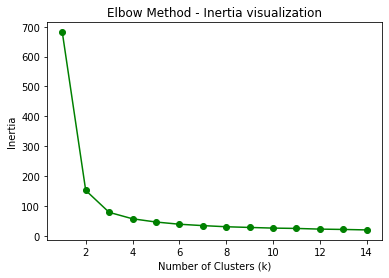

In [9]:
plt.plot(range(1, n_clusters), K_inertia, marker='o', c='green');
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia visualization');

## Using Grid Search CV

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
kmeans = KMeans(random_state=44)

In [12]:
parameters = {
    'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [13]:
cv = GridSearchCV(kmeans, parameters, cv=5)

In [14]:
cv.fit(X, y)

GridSearchCV(cv=5, estimator=KMeans(random_state=44),
             param_grid={'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [15]:
cv.best_params_

{'n_clusters': 10}

In [16]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+-{}) for {}'.format(round(mean,3), round(std * 2,3), params))

In [17]:
print_results(cv)

BEST PARAMS: {'n_clusters': 10}

-191.509 (+-192.128) for {'n_clusters': 1}
-40.462 (+-39.577) for {'n_clusters': 2}
-17.238 (+-9.89) for {'n_clusters': 3}
-13.428 (+-6.134) for {'n_clusters': 4}
-12.81 (+-6.499) for {'n_clusters': 5}
-10.35 (+-3.48) for {'n_clusters': 6}
-9.798 (+-3.164) for {'n_clusters': 7}
-7.866 (+-3.434) for {'n_clusters': 8}
-7.75 (+-4.162) for {'n_clusters': 9}
-7.726 (+-4.333) for {'n_clusters': 10}


---------

# k-NN - Hyper Parameter Tuning

In [18]:
from sklearn.datasets import load_iris
data = load_iris()

X = data['data']
y = data['target']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Grid Search CV

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

In [45]:
parameters = {
    'n_neighbors': [i for i in range(1,50)],
    'weights': ['uniform', 'distance'],
    'leaf_size': [15, 20],
    'metric': ['minkowski']
}

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
cv = GridSearchCV(knn, parameters, cv=5, verbose=1)

In [48]:
cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 196 candidates, totalling 980 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [15, 20], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [49]:
print_results(cv)

BEST PARAMS: {'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 6, 'weights': 'uniform'}

0.937 (+-0.092) for {'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
0.937 (+-0.092) for {'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
0.938 (+-0.043) for {'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'}
0.937 (+-0.092) for {'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
0.937 (+-0.092) for {'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
0.937 (+-0.092) for {'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
0.955 (+-0.058) for {'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'uniform'}
0.937 (+-0.092) for {'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}
0.955 (+-0.058) for {'leaf_size': 15, 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'un

In [50]:
cv.best_params_

{'leaf_size': 15,
 'metric': 'minkowski',
 'n_neighbors': 6,
 'weights': 'uniform'}

-------

## Manually Scoring and Visualization

In [52]:
knn_accuracy_test = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights='uniform', leaf_size=15)
    knn.fit(scaled_X_train, y_train)
    knn_accuracy_test.append(knn.score(scaled_X_test, y_test))

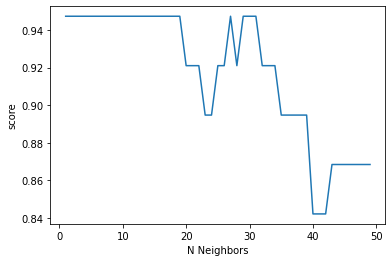

In [56]:
plt.plot(np.arange(1, 50), knn_accuracy_test, label='test');
plt.xlabel('N Neighbors')
plt.ylabel('score');

------------


# Overfitting and Underfitting

![](Images/overunderfitting.png)

In [57]:
knn_accuracy_test = []
knn_accuracy_train = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights='uniform', leaf_size=15)
    knn.fit(scaled_X_train, y_train)
    knn_accuracy_train.append(knn.score(scaled_X_train, y_train))
    knn_accuracy_test.append(knn.score(scaled_X_test, y_test))

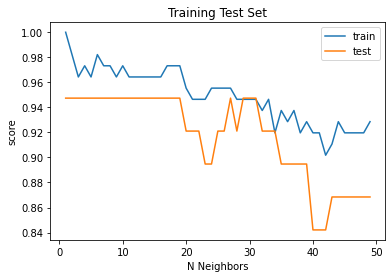

In [61]:
plt.plot(np.arange(1, 50), knn_accuracy_train, label='train');
plt.plot(np.arange(1, 50), knn_accuracy_test, label='test');
plt.legend()
plt.xlabel('N Neighbors')
plt.ylabel('score');
plt.title('Training Test Set');